# EDA proyecto

# 1. Descripción de datos

El siguiente set de datos pertenece a una serie de interacciones registradas en un centro de llamadas por dia a lo largo del tiempo. Los datos estan registrados por fecha identificando si es un dia feriado o no y la cantidad de llamadas resitrada por dia.

Descripcion de columnas:
- Fecha: fecha de los registros.
- StateHoliday: indicador de dias feriados.
- Real Calls: numero de llamadas registrado en el dia.

In [31]:
import pandas as pd
from time import mktime
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()
sns.set_context("paper")

## Carga y visualización de datos

In [32]:
#df_proyect = pd.read_csv('C:/BK/Julian Acevedo/WFM_2021-11-08/WFM nov.2021/Analitica/U.NORTE/Vizualizacion datos R y Python/Proyecto/ts_dash.csv', delimiter=';')

df_proyect = pd.read_csv('C:/Users/Edward Morales/Documents/ts_dash.csv', delimiter=';')
df_proyect['FECHA'] = pd.to_datetime(df_proyect['FECHA'], dayfirst=True)
#df_proyect.set_index('FECHA', inplace=True)
df_proyect.head(10)

,FECHA,StateHoliday,REAL CALLS
0,2020-02-01,0.0,293.0
1,2020-02-02,0.0,29.0
2,2020-02-03,0.0,2881.0
3,2020-02-04,0.0,2776.0
4,2020-02-05,0.0,2586.0
5,2020-02-06,0.0,2533.0
6,2020-02-07,0.0,2295.0
7,2020-02-08,0.0,276.0
8,2020-02-09,0.0,39.0
9,2020-02-10,0.0,3057.0


## Descripción de los datos

In [33]:
df_proyect.describe()

,FECHA,StateHoliday,REAL CALLS
count,1367,1367.000000,1367.000000
mean,2021-12-15 00:00:00,0.031456,2215.411851
min,2020-02-01 00:00:00,0.000000,25.000000
25%,2021-01-07 12:00:00,0.000000,370.000000
50%,2021-12-15 00:00:00,0.000000,2693.000000
75%,2022-11-21 12:00:00,0.000000,3305.000000
max,2023-10-29 00:00:00,2.000000,5575.000000
std,NaN,0.205430,1445.673549


## Información de los datos

In [34]:
df_proyect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA         1367 non-null   datetime64[ns]
 1   StateHoliday  1367 non-null   float64       
 2   REAL CALLS    1367 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 32.2 KB


## verificar datos unicos

In [35]:
df_proyect.nunique()

FECHA           1367
StateHoliday       3
REAL CALLS      1039
dtype: int64

## Visualizacion de los datos

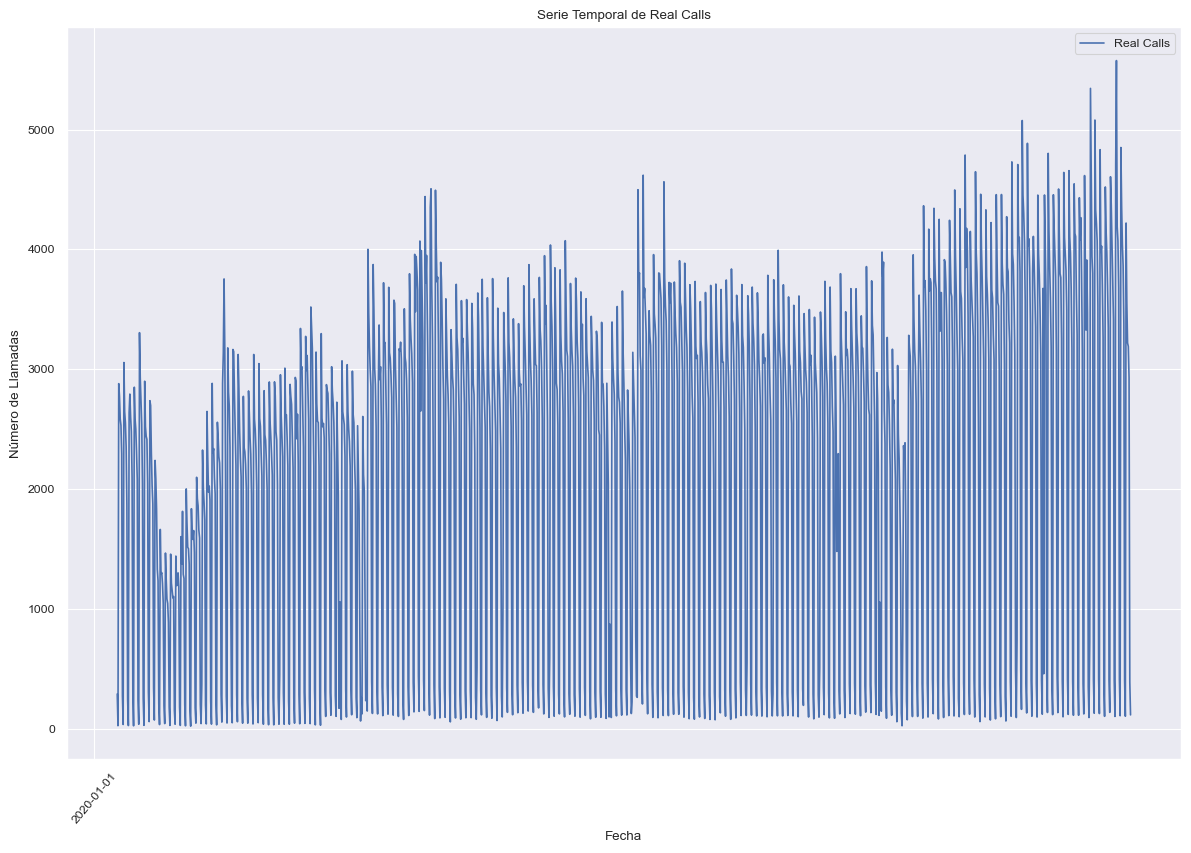

In [36]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=df_proyect, x="FECHA", y="REAL CALLS", label='Real Calls')
freq = int(30)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])
plt.tight_layout()
plt.xticks(rotation=50)
plt.title('Serie Temporal de Real Calls')
plt.xlabel('Fecha')
plt.ylabel('Número de Llamadas')
plt.legend()
plt.show();

## Histograma

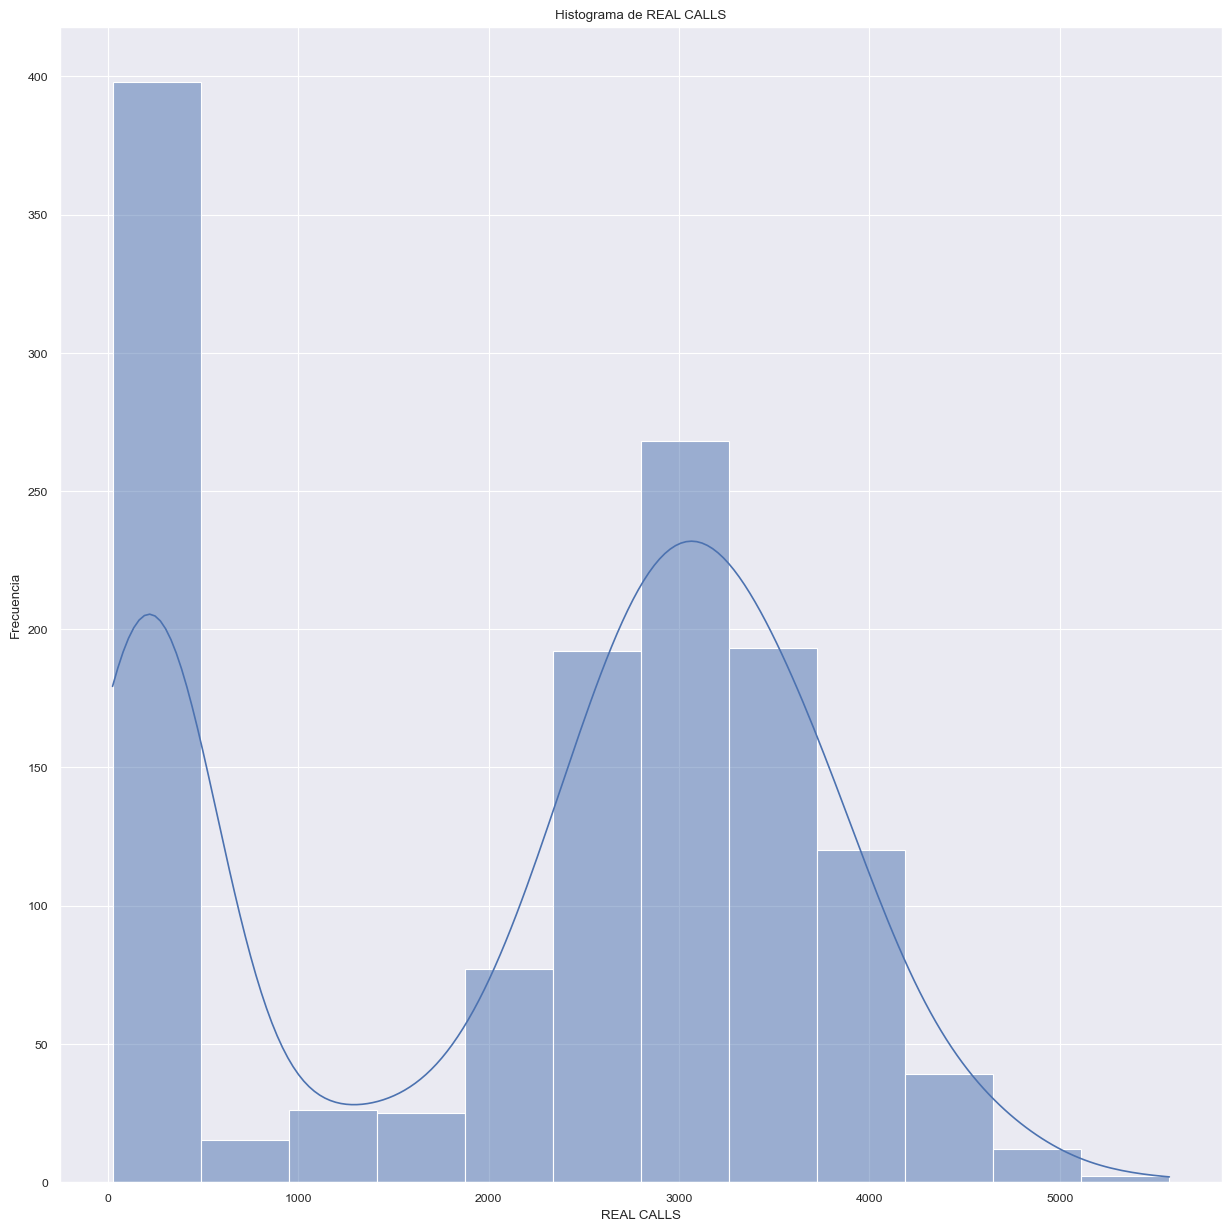

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_proyect['REAL CALLS'],kde=True)
plt.title('Histograma de REAL CALLS')
plt.xlabel('REAL CALLS')
plt.ylabel('Frecuencia')
plt.show()


## Boxplot

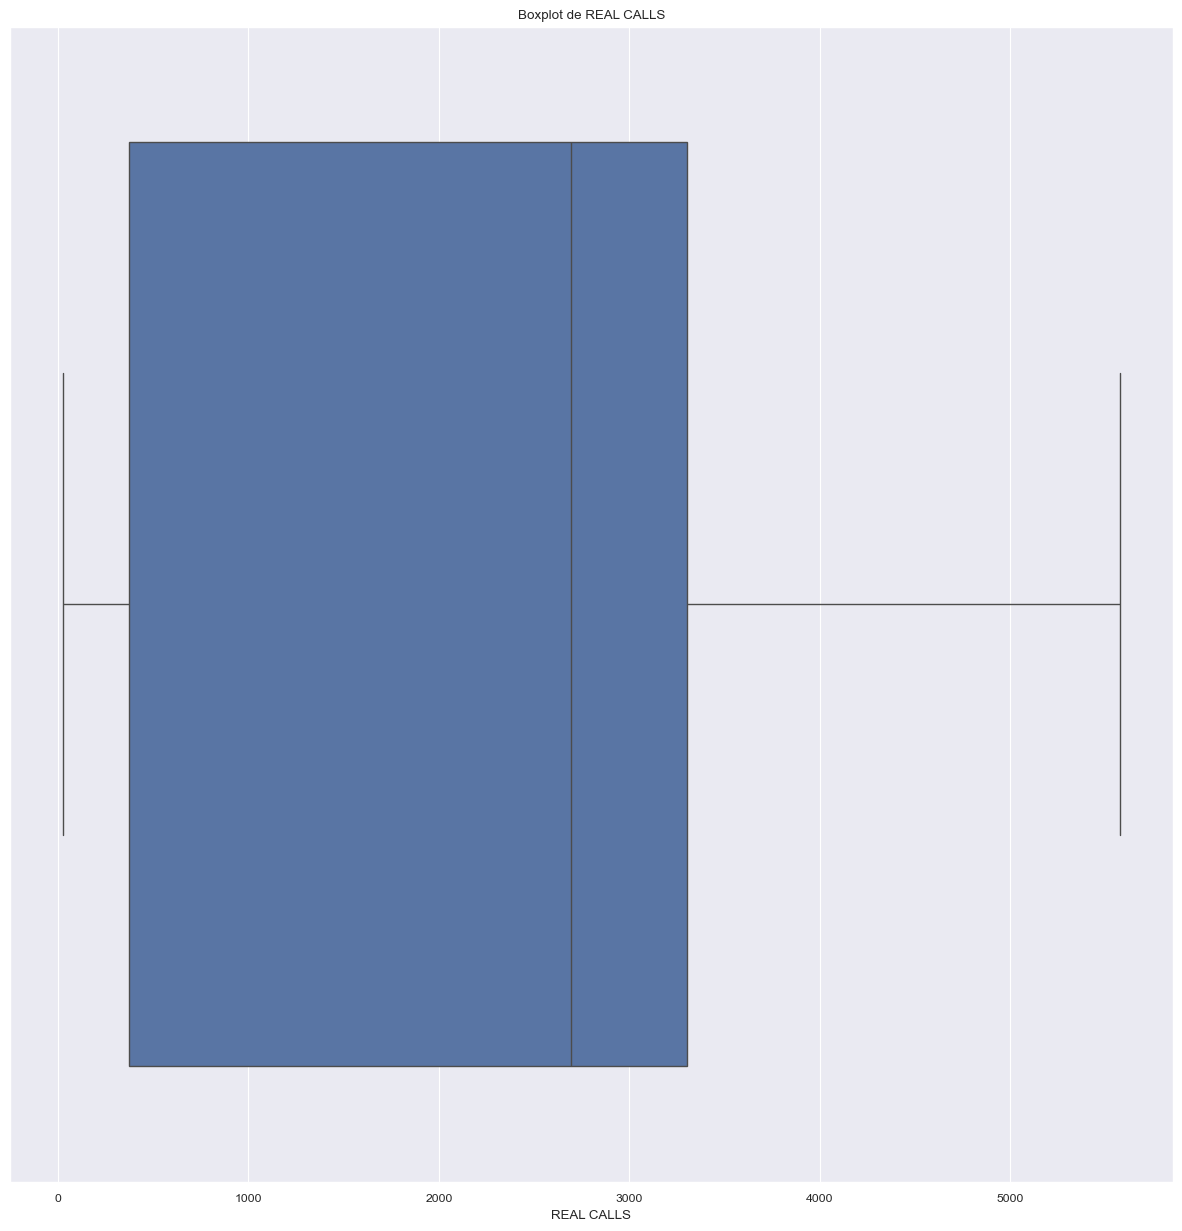

In [38]:
sns.boxplot(x=df_proyect['REAL CALLS'])
plt.title('Boxplot de REAL CALLS')
plt.xlabel('REAL CALLS')
plt.show()

## Graficas de datos por mes


In [39]:
dff = df_proyect.copy()
dff['FECHA'] = pd.to_datetime(dff['FECHA'], format='%d/%m/%Y')
dff['AÑO'] = dff['FECHA'].dt.year
#dff['MES'] = dff['FECHA'].dt.month
dff['MES'] = dff['FECHA'].dt.month_name()
#dff['DIA'] = dff['FECHA'].dt.day
dff['DiaSemana'] = dff['FECHA'].dt.day_name()

#dff = dff[dff['FECHA'].dt.year == 2022]
dff.head()

,FECHA,StateHoliday,REAL CALLS,AÑO,MES,DiaSemana
0,2020-02-01,0.0,293.0,2020,February,Saturday
1,2020-02-02,0.0,29.0,2020,February,Sunday
2,2020-02-03,0.0,2881.0,2020,February,Monday
3,2020-02-04,0.0,2776.0,2020,February,Tuesday
4,2020-02-05,0.0,2586.0,2020,February,Wednesday


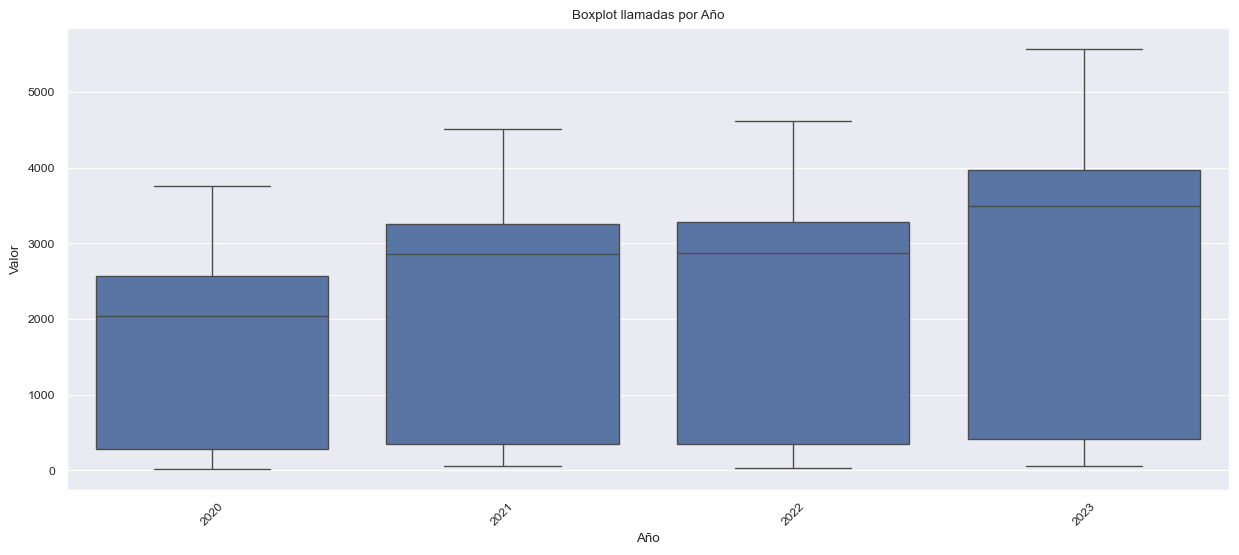

In [40]:
#dff['AÑO'] = dff['FECHA'].dt.to_period('Y')
plt.figure(figsize=(15, 6))
sns.boxplot(x='AÑO', y='REAL CALLS', data=dff)
 
plt.title('Boxplot llamadas por Año')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.xticks(rotation=45)  # Rota las etiquetas para mejor lectura
plt.show()

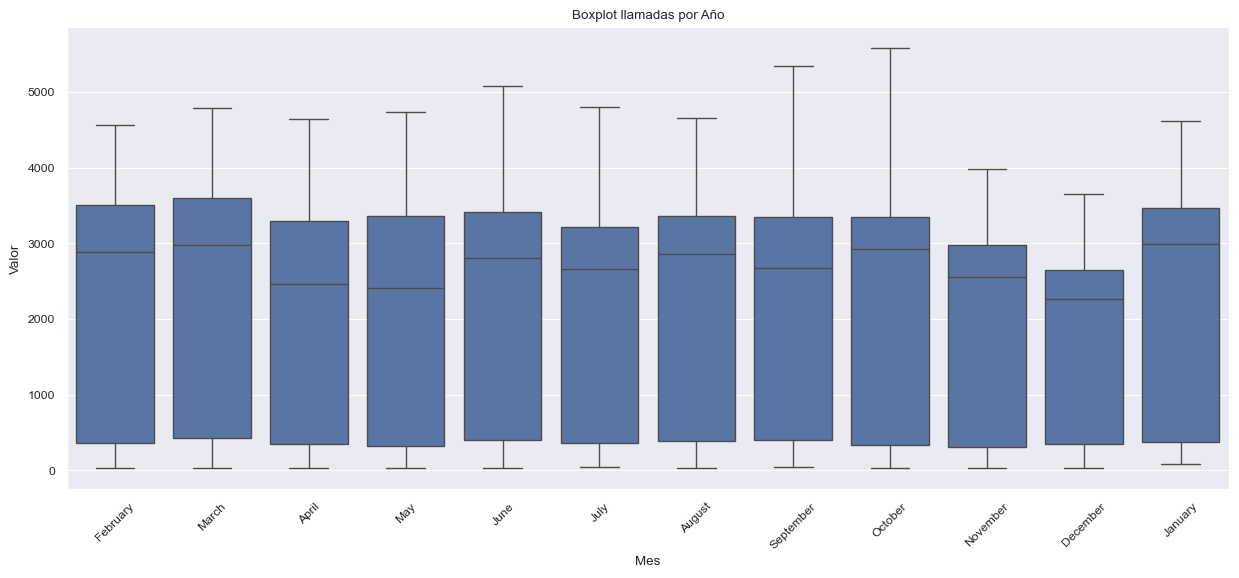

In [41]:
#dff['AÑO'] = dff['FECHA'].dt.to_period('Y')
plt.figure(figsize=(15, 6))
sns.boxplot(x='MES', y='REAL CALLS', data=dff)
 
plt.title('Boxplot llamadas por Año')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.xticks(rotation=45)  # Rota las etiquetas para mejor lectura
plt.show()

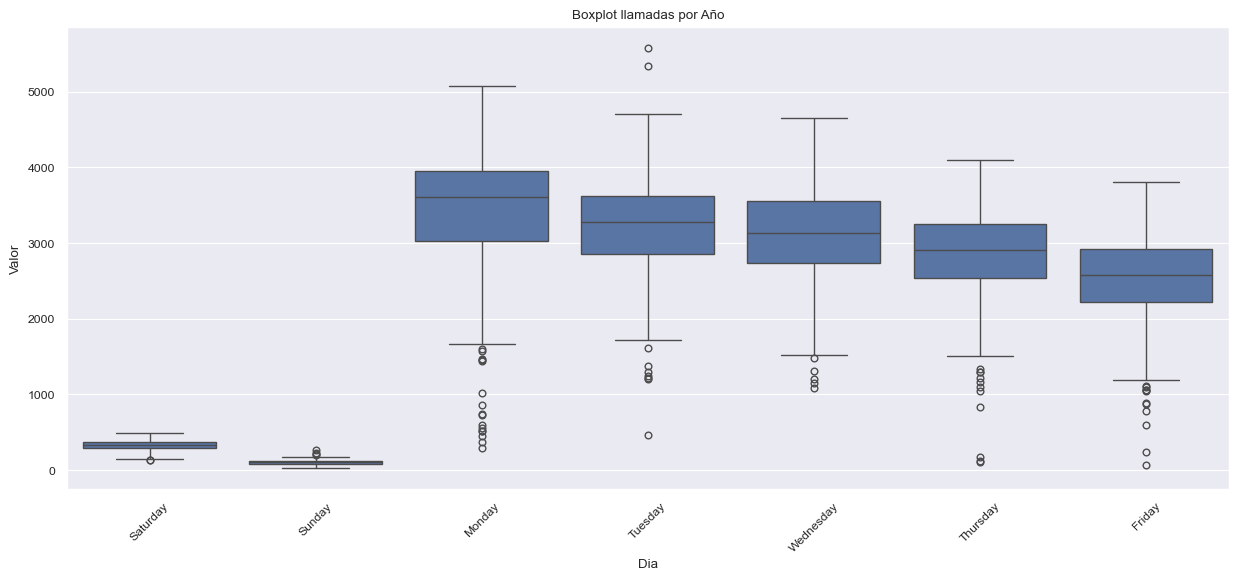

In [42]:
#dff['AÑO'] = dff['FECHA'].dt.to_period('Y')
plt.figure(figsize=(15, 6))
sns.boxplot(x='DiaSemana', y='REAL CALLS', data=dff)
 
plt.title('Boxplot llamadas por Año')
plt.xlabel('Dia')
plt.ylabel('Valor')
plt.xticks(rotation=45)  # Rota las etiquetas para mejor lectura
plt.show()

En los graficos anteriores podemos identificar que la serie de tiempo de llamadas ha tenido una tendencia positiva a los largo del tiempo, adicional a esto se identifica visualmente una estacionalidad en el comportamiento de las llamadas a lo largo de los meses y mucho mas pronunciada cuando lo vemos por dia, se entiende que los lunes es cuando mayor cantidad de llamadas ingresa y va descendiendo hasta el dia viernes, los sabados y domingos se tienen registros muy bajos de llamadas. 

## Datos faltantes

In [43]:
df_proyect['REAL CALLS'].isnull().sum()


0

# 2. Prueba Dickey-Fuller

In [44]:
from statsmodels.tsa.stattools import adfuller

# Realización de la prueba de Dickey-Fuller aumentada
dickey_fuller_result = adfuller(df_proyect['REAL CALLS'])

# Extracción de los resultados
test_stat = dickey_fuller_result[0]
p_value = dickey_fuller_result[1]
crit_val = dickey_fuller_result[4]

#df_test_statistic, df_p_value, df_critical_values

alpha=0.05
print(f'Hipotesis:')
print(f'H0: Serie no estacionaria')
print(f'H1: Serie estacionaria')
print(f'Estadistico de prueba:{test_stat:.4f}')
print(f'p-value:{p_value:.4f}')
print(f'Alpha: {alpha}')
if p_value > alpha:
    print('No se rechaza H0, por lo tanto la serie no es estacionaria.')
else:
    print('Se rechaza H0, por lo tanto la serie es estacionaria.')




Hipotesis:
H0: Serie no estacionaria
H1: Serie estacionaria
Estadistico de prueba:-2.4421
p-value:0.1302
Alpha: 0.05
No se rechaza H0, por lo tanto la serie no es estacionaria.


## 3. Descomposición

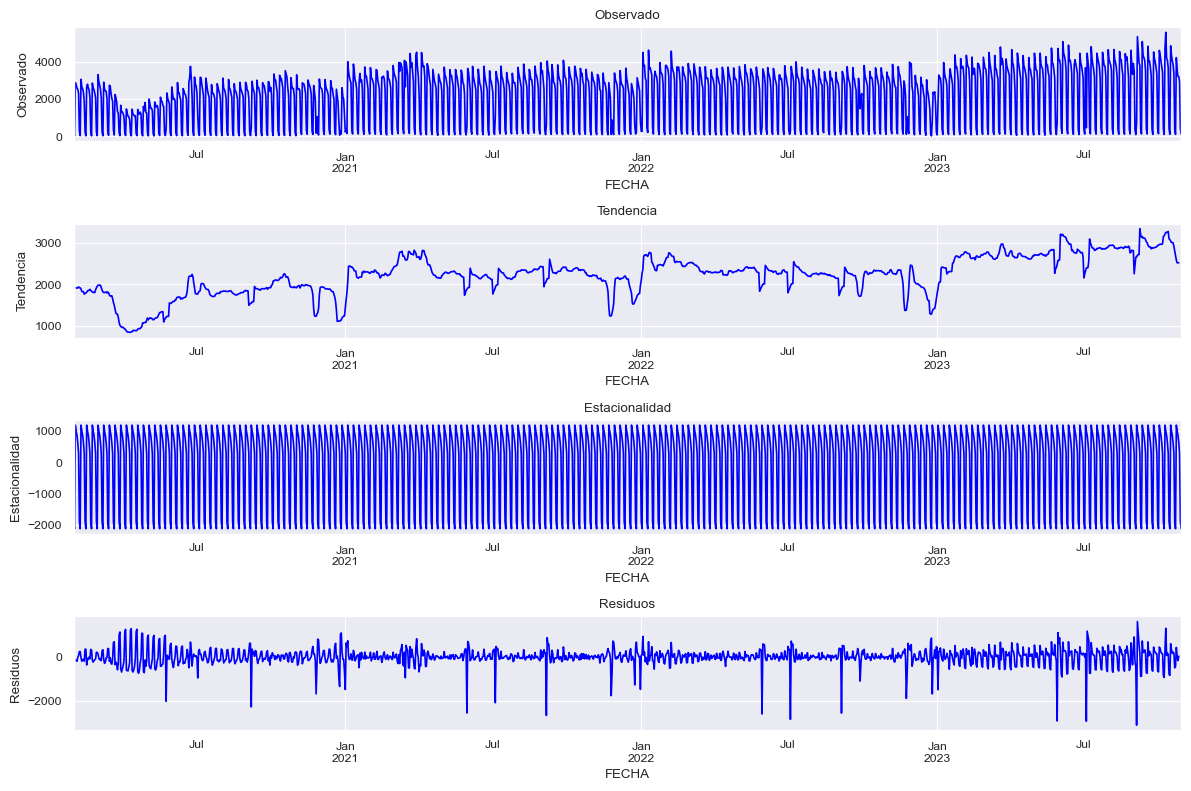

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
dff_comp=df_proyect.copy()
dff_comp.set_index('FECHA', inplace=True)

# Descomposición de la serie temporal
decomposition = seasonal_decompose(dff_comp['REAL CALLS'], model='additive')

# Creando gráficas para cada componente
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))

decomposition.observed.plot(ax=ax1, color='blue')
ax1.set_title('Observado')
ax1.set_ylabel('Observado')

# Tendencia
decomposition.trend.plot(ax=ax2, color='blue')
ax2.set_title('Tendencia')
ax2.set_ylabel('Tendencia')

# Estacionalidad
decomposition.seasonal.plot(ax=ax3, color='blue')
ax3.set_title('Estacionalidad')
ax3.set_ylabel('Estacionalidad')

# Residuos
decomposition.resid.plot(ax=ax4, color='blue')
ax4.set_title('Residuos')
ax4.set_ylabel('Residuos')

plt.tight_layout()
plt.show()


In [46]:
dff_comp=df_proyect.copy()
dff_comp.set_index('FECHA', inplace=True)
dff_comp.head()

,StateHoliday,REAL CALLS
FECHA,,
2020-02-01,0.0,293.0
2020-02-02,0.0,29.0
2020-02-03,0.0,2881.0
2020-02-04,0.0,2776.0
2020-02-05,0.0,2586.0


In [47]:
result = adfuller(df_proyect['REAL CALLS'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.442081
p-value: 0.130210


- Dado que el valor crítico, el estadístico ADF =-2,442081 > -2,5,-3,4,-2,8 (valores $t$ en intervalos de confianza de 1%,5% y 10%), se acepta la hipótesis nula ($H_{0}$).

- p-valor = 0,130210 > 0,05. Dado que el valor $p$ de Adfuller es mayor que un determinado valor alfa especificado (5%, nivel de significación o intervalo de confianza del 95%), se acepta la hipótesis nula ($H_{0}$), es decir, **la serie temporal no es estacionaria**.



# Transformacion de serie no estacionaria a estacionaria

In [48]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

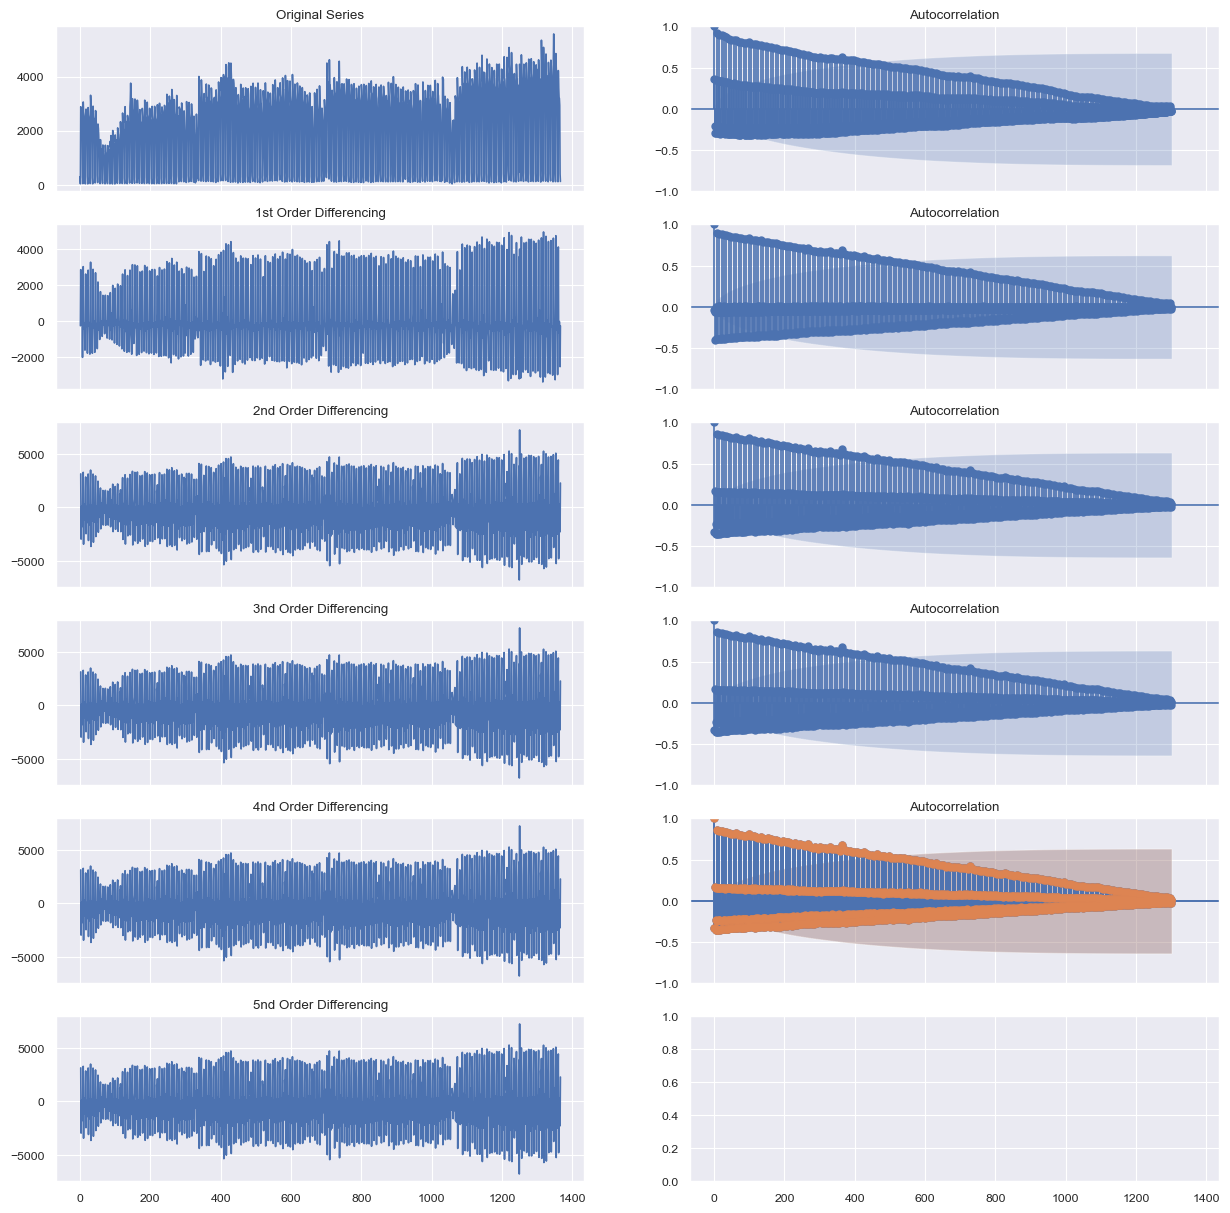

In [49]:
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(6, 2, sharex=True)
axes[0, 0].plot(df_proyect['REAL CALLS']); axes[0, 0].set_title('Original Series')
plot_acf(df_proyect['REAL CALLS'], ax=axes[0, 1], lags = 1300);

axes[1, 0].plot(df_proyect['REAL CALLS'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_proyect['REAL CALLS'].diff().dropna(), ax=axes[1, 1], lags = 1300);

axes[2, 0].plot(df_proyect['REAL CALLS'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_proyect['REAL CALLS'].diff().diff().dropna(), ax=axes[2, 1], lags = 1300);

axes[3, 0].plot(df_proyect['REAL CALLS'].diff().diff()); axes[3, 0].set_title('3nd Order Differencing')
plot_acf(df_proyect['REAL CALLS'].diff().diff().dropna(), ax=axes[3, 1], lags = 1300);

axes[4, 0].plot(df_proyect['REAL CALLS'].diff().diff()); axes[4, 0].set_title('4nd Order Differencing')
plot_acf(df_proyect['REAL CALLS'].diff().diff().dropna(), ax=axes[4, 1], lags = 1300);

axes[5, 0].plot(df_proyect['REAL CALLS'].diff().diff()); axes[5, 0].set_title('5nd Order Differencing')
plot_acf(df_proyect['REAL CALLS'].diff().diff().dropna(), ax=axes[4, 1], lags = 1300);

# Primera diferenciacion

In [50]:
from statsmodels.tsa.stattools import adfuller

# Realización de la prueba de Dickey-Fuller aumentada
dickey_fuller_result = adfuller(df_proyect['REAL CALLS'].diff().dropna())

# Extracción de los resultados
test_stat = dickey_fuller_result[0]
p_value = dickey_fuller_result[1]
crit_val = dickey_fuller_result[4]

#df_test_statistic, df_p_value, df_critical_values

alpha=0.05
print(f'Hipotesis:')
print(f'H0: Serie no estacionaria')
print(f'H1: Serie estacionaria')
print(f'Estadistico de prueba:{test_stat:.4f}')
print(f'p-value:{p_value:.4f}')
print(f'Alpha: {alpha}')
if p_value > alpha:
    print('No se rechaza H0, por lo tanto la serie no es estacionaria.')
else:
    print('Se rechaza H0, por lo tanto la serie es estacionaria.')




Hipotesis:
H0: Serie no estacionaria
H1: Serie estacionaria
Estadistico de prueba:-12.4786
p-value:0.0000
Alpha: 0.05
Se rechaza H0, por lo tanto la serie es estacionaria.


Realizando le primera diferenciacion y aplicando nuevamente el test de dicky-fuller concluimos que la serie se puede transformar de no estacionaria a estacionaria aplicando diferenciacion.

## Predictivo Ramdom forest

In [51]:
df_proyect.head()

,FECHA,StateHoliday,REAL CALLS
0,2020-02-01,0.0,293.0
1,2020-02-02,0.0,29.0
2,2020-02-03,0.0,2881.0
3,2020-02-04,0.0,2776.0
4,2020-02-05,0.0,2586.0


In [63]:

df_train = df_proyect.iloc[:-28]
df_test = df_proyect.tail(28)


X_train = df_train['FECHA']
y_train = df_train['REAL CALLS']
X_test = df_test['FECHA']
y_test = df_test['REAL CALLS']

In [67]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Suponiendo que 'df' es tu DataFrame y 'REAL_CALLS' es tu columna objetivo

# Preparación de los datos: crea un DataFrame con características rezagadas
def create_lagged_features(df_proyect, n_lags=1):
    new_df = pd.DataFrame(index=df_proyect.index)
    new_df['target'] = df_proyect['REAL CALLS']
    
    # Crear características rezagadas
    for i in range(1, n_lags + 1):
        new_df[f'lag_{i}'] = df_proyect['REAL CALLS'].shift(i)
    
    new_df = new_df.dropna()
    return new_df

# Crear características rezagadas
lagged_df = create_lagged_features(df_proyect, n_lags=7)

# Dividir los datos en características y objetivo
X = lagged_df.drop('target', axis=1)
y = lagged_df['target']

#Dividir en conjunto de entrenamiento y de prueba
X_train = X.iloc[:-28]
y_train = y.iloc[:-28]
X_test = X.tail(28)
y_test = y.tail(28)

# Entrenamiento del modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones y evaluar
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'RMSE: {rmse}')



RMSE: 327.64035785119205


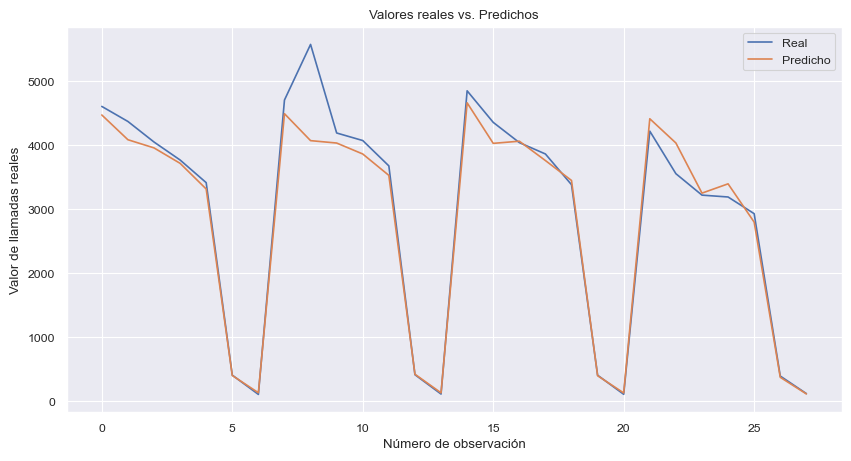

In [68]:
import matplotlib.pyplot as plt

# Asumimos que ya tienes las predicciones y los valores reales
# predictions = model.predict(X_test)  # Este es el resultado de tu modelo
# y_test son los valores reales

# Para un gráfico simple de valores reales vs predichos:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Real')
plt.plot(predictions, label='Predicho')
plt.title('Valores reales vs. Predichos')
plt.xlabel('Número de observación')
plt.ylabel('Valor de llamadas reales')
plt.legend()
plt.show()


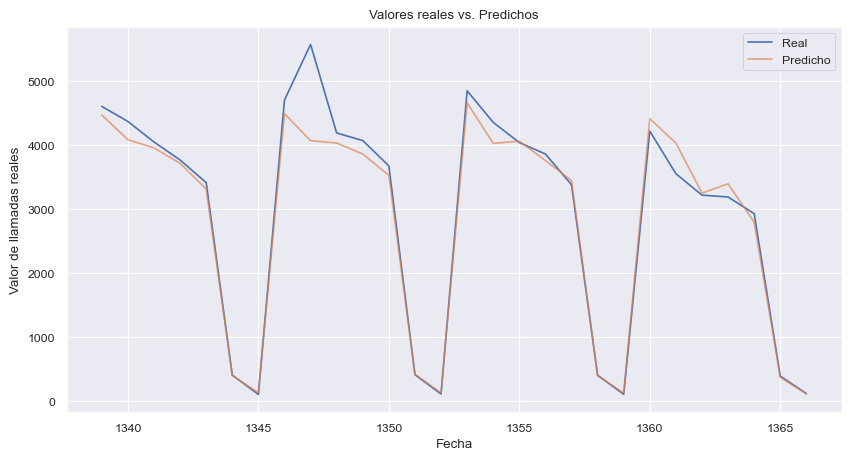

In [69]:
# Asegúrate de que y_test tenga un índice de tiempo como índice si estás trabajando con series temporales
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test.values, label='Real')
plt.plot(y_test.index, predictions, label='Predicho', alpha=0.7)  # Alpha para hacer la línea un poco transparente
plt.title('Valores reales vs. Predichos')
plt.xlabel('Fecha')
plt.ylabel('Valor de llamadas reales')
plt.legend()
plt.show()
